<a href="https://colab.research.google.com/github/colingeraghtyCUNYGC/Perceived-comfort-speaking-about-anxiety-or-depression/blob/main/text_the_great_Gatsby.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 before using this eBook. Title: The Great Gatsby Release date: January 17, 2021 [eBook #64317] Language: English *** START OF THE PROJECT GUTENBERG EBOOK THE GREAT GATSBY *** The Great Gatsby Then wear the gold hat, if that will move her; If you can bounce high, bounce for her too, Till she cry “Lover, gold-hatted, high-bouncing lover, I must have you!” Thomas Parke d’Invilliers I In my younger and more vulnerable years my father gave me some advice that I’ve been turning over in my mind ever since. “Whenever you feel lik


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


1796
['1919' 'abandoned' 'able' 'abortive' 'abruptly' 'absence' 'absently'
 'absolute' 'absolutely' 'absorbed' 'absorbing' 'absurd' 'accepted'
 'according' 'accusation' 'accused' 'accusingly' 'acquaintance' 'acre'
 'act']


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


73506.05355480585


IndexError: ignored

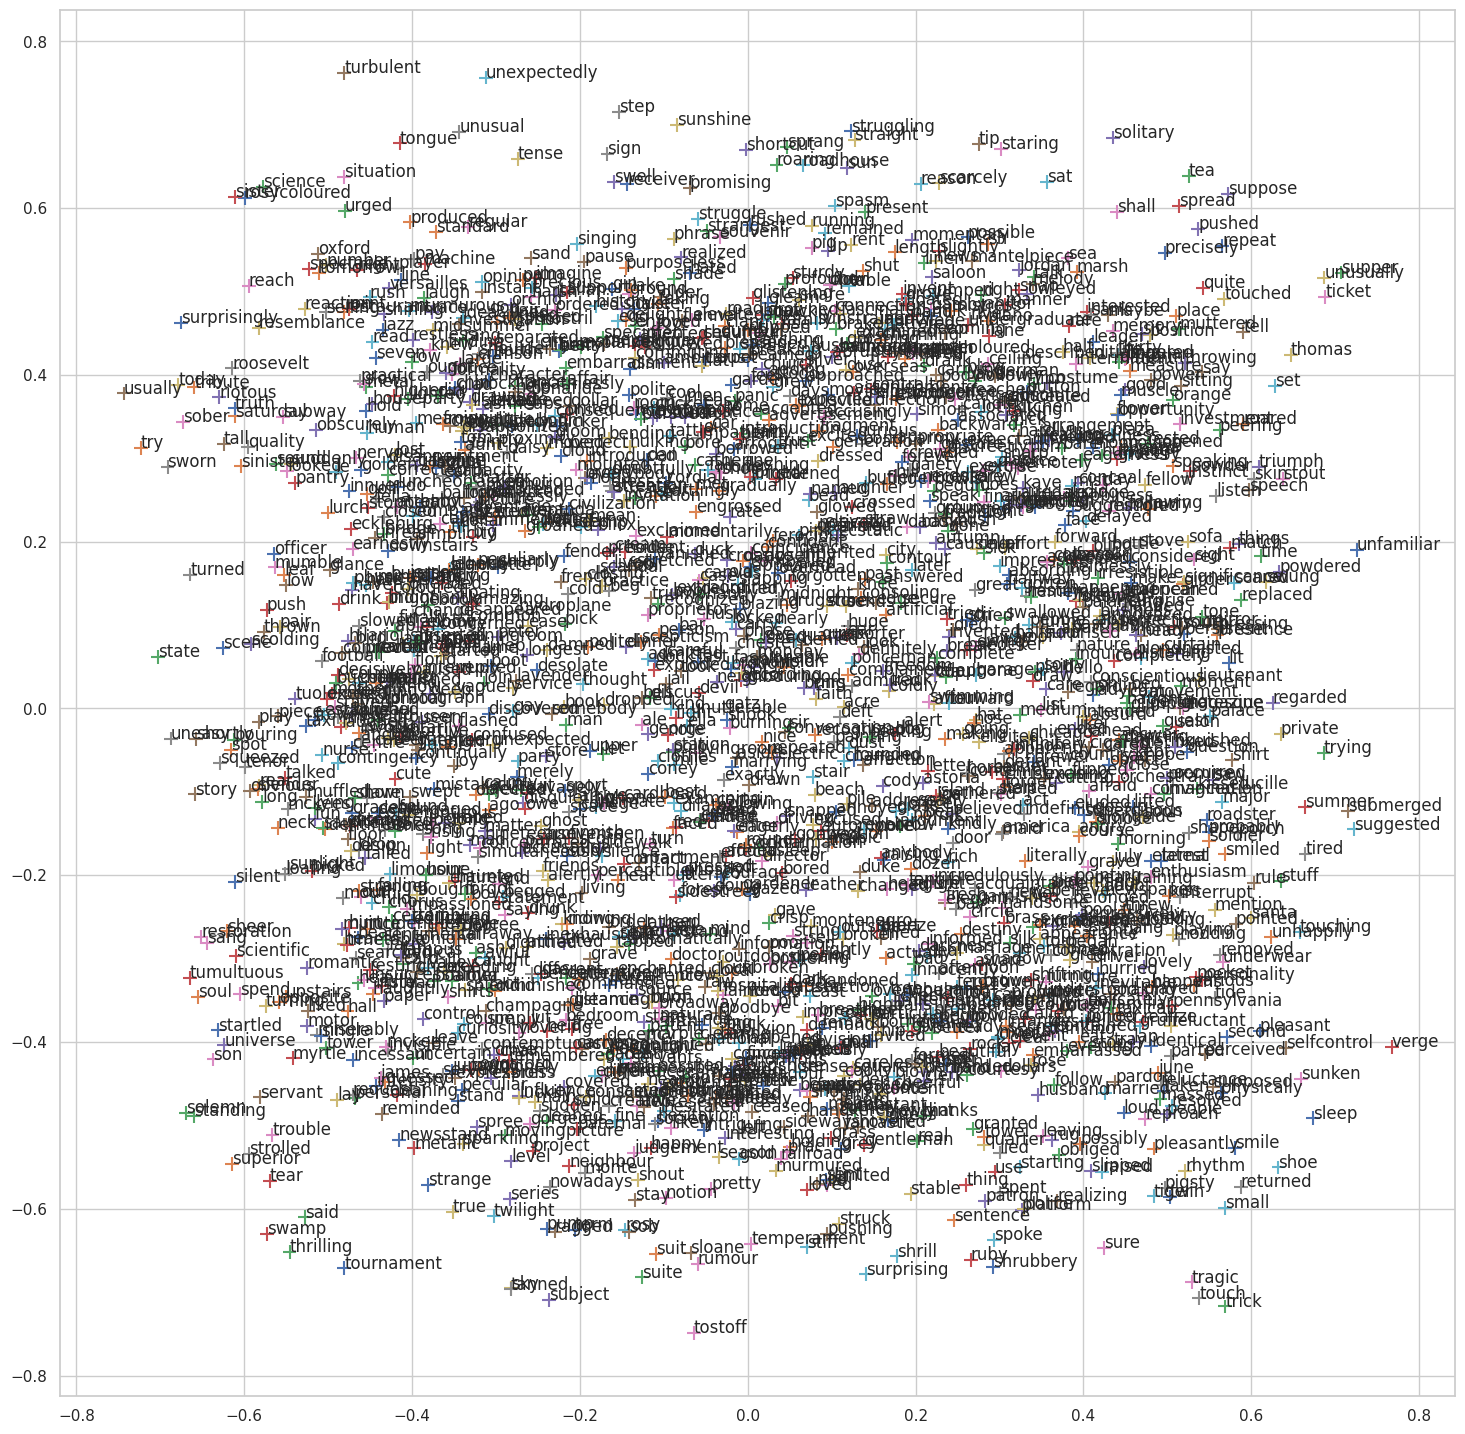

In [10]:
!pip install boilerpy3
!pip install contractions
# Import necessary libraries
from boilerpy3 import extractors

# URL for "The Great Gatsby" on Gutenberg
URL = 'https://www.gutenberg.org/cache/epub/64317/pg64317-images.html'

# Initialize an empty dictionary to store the book content
books = {}

try:
    extractor = extractors.ArticleExtractor()
    books[URL] = str(extractor.get_content_from_url(URL)).replace('\n', ' ')
except:
    print("Cannot open URL.")

# Print the first 1000 characters to check if it's working
print(books[URL][:1000])
!pip install boilerpy3 nltk contractions
import nltk
import string
import contractions
from boilerpy3 import extractors

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
# Define punctuations, stopwords, and lemmatizer
punctuation = string.punctuation
stopwords = nltk.corpus.stopwords.words('english')
lemmatizer = nltk.WordNetLemmatizer()
corpus = []
sentences2 = []  # This seems to be unused in the code you provided

# Define a function to clean the text
def clean_text(text):
    for character in string.punctuation:
        text = text.replace(character, '')
    text = text.lower()
    text = contractions.fix(text)
    text_token_list = [word for word in text.split(' ') if word not in stopwords]
    text_token_list = [lemmatizer.lemmatize(word) for word in text_token_list]
    text = ' '.join(text_token_list)
    return text

# Assuming you've already scraped the content using the previous code
for book in books.keys():
    sentences = nltk.sent_tokenize(books[book])
    for term in sentences:
        words = nltk.word_tokenize(clean_text(term))
        sentence = ' '.join(words)
        corpus.append(sentence)

print(len(corpus))
from sklearn.feature_extraction.text import CountVectorizer

# Instantiate the CountVectorizer
vectorizer = CountVectorizer(
    min_df=0.001,
    max_df=0.99,
    stop_words='english',
    ngram_range=(1,1)
    )

# Fit the vectorizer to the corpus and transform the corpus into a term-document matrix
gutenberg_tm = vectorizer.fit_transform(corpus)

# Get the feature names from the vectorizer
gutenberg_feature_names = vectorizer.get_feature_names_out()

# Optionally, you can print out some of the feature names to check
print(gutenberg_feature_names[:20])  # prints the first 20 feature names

!pip install pandas

import pandas as pd

  # Create a DataFrame using the term-document matrix and feature names
gutenberg_dtm = pd.DataFrame(gutenberg_tm.todense(), columns=gutenberg_feature_names)

# Display the top rows of the DTM
gutenberg_dtm.head()
!pip install scikit-learn

from sklearn.manifold import MDS
from sklearn.metrics import pairwise_distances

tokens_dist = pairwise_distances(gutenberg_tm, metric='cosine')
# Instantiate the MDS model
mds = MDS(metric=False, n_components=2, random_state=0, dissimilarity='precomputed')

# Apply MDS on the precomputed dissimilarity matrix
tokens_transform = mds.fit_transform(tokens_dist)

# Print the stress of the MDS solution
print(mds.stress_)
!pip install matplotlib seaborn

import matplotlib.pyplot as plt
import seaborn as sb


sb.set_theme(style="whitegrid")
fig = plt.figure(figsize=(18,18))

# Assuming you want to visualize all the tokens/features
for i, feature_name in enumerate(gutenberg_feature_names):
    plt.scatter(tokens_transform[i, 0], tokens_transform[i, 1], sizes=(100, 100), marker='+')
    plt.text(tokens_transform[i, 0], tokens_transform[i, 1], feature_name)

plt.title('MDS plot of Tokens in "The Great Gatsby"')
plt.show()




